# Prediction of severity of a traffic accident related to weather conditions

## Table of contents
* [Introduction: Problem Description](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Problem Description <a name="introduction"></a>

The automobile is one of the most common methods of transportation worlwide. And according to the Centers for Disease Control and Prevention approximately 3,700 people die each in day in a car crash around the world, that amounts to nearly a million and a half people each year.

It is important then to look for methods and prevention strategies to be able to reduce the amount of accidents. This would not only result in saving human lives but could reduce drastically costs, to parties such as the government, health organizations or even the individuals themselves.

Some of the most contributing factors to driving accidents are: falling asleep at the wheel,loss of vehicle control (due to mechanical reasons or external e.g. the weather, other drivers), blind left turns, not staying in the proper lane.

Some of this factors can be attenuated, as is taking extra precautions during bad weather conditions or possibly even postponing the trip if possible.

### Purpose of work

The purpose of this work is to see the relationship between certain driving conditions and  what type of accidents are drivers exposed to: severe, fatal or a slight driving accident. Also to develop a model that can predict the outcome of an accident taking into account the condtions of the road and some other factors.

### Intended public

This type of work could be of interest to the government: to be able to see the type of maintenance required on works, to insurance companies which can now have a better assessment of the probable type of accidents a driver can be involved in and finally to the drivers, it can help reduce the risks they take when driving. 

## Data <a name="data"></a>

The dataset is under a OGL (Open Government License)

It has records of road accidents from the year 2005 to 2014 in United Kingdom. It is comprised of 4 files: the accident file which contains information about the accident severity, weather, lcocation, date, hour, day of the week, etc. 
The vehicle file: which contains the details about the vehicles involved.
The casualty file which contains information about the severity, age, sex, casualty type, etc.
And finally a lookup file which has the description for the previously mentioned files. 

For this particular study, the files that will be used are the accident file and the casualty file which contains the information deemed necessary to develop an adequate model to predict the severity of and accident taking into consideration the environmental variables.

The dataset can be found in [UK Accidents 10 years history with many variables](https://www.kaggle.com/benoit72/uk-accidents-10-years-history-with-many-variables/notebooks) at the Kaggle website.

Most of them have are numeric attributes which represent a particular state, however in the development notebook this numeric indices have been replaced by their corresponding 'word' representation to make the charts and information more easily understandable.

This notebook will be used for the Capstone Project of the Coursera Data Science Specialization. The project consists on a model to predict the severity of an accident taking into account the conditions of the day and the road.

Some of the more relevant attributes on the dataset are the following:


| Field             | Description                                                                           | 
|-------------------|---------------------------------------------------------------------------------------|
| Accident_Index    | Unique identifier of the accident                                                     |
| Accident_Severity | Describes severity of accident (desired label)                                        |
| Date          | Date of the accident|
| Day_of_Week    | Day of the week when the accident occurred                                        |
| Road_Type          | Type of road where the accident occurred               |
| Speed_limit               | Speed limit in the zone the accident occurred                                                                   |
| Junction_Details         | Description of type of junction where the accident happened (roundabout, 4-way,etc)                                                              |
| Junction_Control            |Type of control at the junction (trafficlight, stop sign, etc)|
| Light_Conditions  | Lighting conditions at time of accident |
| Weather_Conditions | Weather conditions when at time of accident |
|Road_Surface_Conditions | Conditons of the road surface at location of accident |
|Urban_or_Rural_Area | Area of accident |
|Vehicle_Type | Description of Vehicle (car, van, truck, etc) |
|Age_Band_of_Driver | Age range for driver |
|Age_of_Vehicle | Vehicle's age |

## Methodology <a name="methodology"></a>

The project consists on an analysis on the data discover the most relevant factors that contribute to vehicular accidents and that determine the severity of the accident. The analysis is limited to data from the **years 2005 to 2010 in the UK**.

The **data** is collected from Kaggle website and a first exploration is conducted. The most relevant **attributes** e.g. **(weather,lighting,road conditions, etc.)** that could contribute to determining the severity of the accident are left in a dataframe and the others are dropped. Next, data cleaning takes place, by dropping rows that have incomplete information or not useful to the analysis. These records are dropped with further impact on the project, due to the vast amount of records available.

Once the analysis is made, a **model (k Nearest Neighbor)** to determine the severity of a possible accident is developed. This will allow to establish which conditions lead to a more dangerous outcome in case of required travel.

## Analysis <a name="analysis"></a>

### Importing the required libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import datetime as dt

In [20]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [21]:
#df = pd.read_csv(r'/home/abrahamvee/Downloads/Data-Collisions.csv')
### EXAMPLE DATASET
#example_ds_filepath='/home/abrahamvee/Downloads/Data-Collisions.csv'
### KAGGLE'S DATASET
kaggle_filepath = '/home/abrahamvee/Documents/Coursera Data Analysis/Capstone Project/accidents2005-2010.csv'
kaggle_filepath2 = '/home/abrahamvee/Documents/Coursera Data Analysis/Capstone Project/vehicles2005-2010.csv'
df1 = pd.read_csv(kaggle_filepath)
df2 = pd.read_csv(kaggle_filepath2)

### Assembling the final dataset to use

In [22]:
### Print a list of the dataset's attributes
print(df1.columns.to_list())

['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']


In [23]:
print(df2.columns.to_list())

['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Junction_Location', 'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type']


Select the attributes that are being used for the model.

In [24]:
#df = df.filter(['SEVERITYCODE','INCKEY','ADDRTYPE','SEVERITYDESC','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES','INCDATE','INCDTTM','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','SPEEDING'])
#df.head()
# KAGGLE'S
df1 = df1.filter(['Accident_Index','Accident_Severity','Number_of_vehicles','Number_of_Casualties','Date','Day_of_Week','Time','Road_Type','Speed_limit',\
                'Junction_Detail','Junction_Control','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Special_Conditions_at_Site','Urban_or_Rural_Area'])
df1.head()

,Accident_Index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
0,200501BS00001,2,1,04/01/2005,3,17:42,6,30,0,-1,1,2,2,0,1
1,200501BS00002,3,1,05/01/2005,4,17:36,3,30,6,2,4,1,1,0,1
2,200501BS00003,3,1,06/01/2005,5,00:15,6,30,0,-1,4,1,1,0,1
3,200501BS00004,3,1,07/01/2005,6,10:35,6,30,0,-1,1,1,1,0,1
4,200501BS00005,3,1,10/01/2005,2,21:13,6,30,0,-1,7,1,2,0,1


In [25]:
df2 = df2.filter(['Accident_Index','Vehicle_Type','Sex_of_Driver','Age_of_Driver','Age_Band_of_Driver','Age_of_Vehicle'])
df2.head()

,Accident_Index,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Age_of_Vehicle
0,200501BS00001,9,2,74,10,-1
1,200501BS00002,11,1,42,7,3
2,200501BS00003,11,1,35,6,5
3,200501BS00003,9,1,62,9,6
4,200501BS00004,9,2,49,8,4


In [26]:
df = pd.merge(df1,df2,on='Accident_Index')
df.head()

,Accident_Index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Age_of_Vehicle
0,200501BS00001,2,1,04/01/2005,3,17:42,6,30,0,-1,1,2,2,0,1,9,2,74,10,-1
1,200501BS00002,3,1,05/01/2005,4,17:36,3,30,6,2,4,1,1,0,1,11,1,42,7,3
2,200501BS00003,3,1,06/01/2005,5,00:15,6,30,0,-1,4,1,1,0,1,11,1,35,6,5
3,200501BS00003,3,1,06/01/2005,5,00:15,6,30,0,-1,4,1,1,0,1,9,1,62,9,6
4,200501BS00004,3,1,07/01/2005,6,10:35,6,30,0,-1,1,1,1,0,1,9,2,49,8,4


### Exploring the dataset

##### Importing Matplotlib

In [27]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df.size

20971500

In [29]:
df = df.dropna()
df.size

20969260

### Remove missing data from dataset

In [30]:
df.query('Sex_of_Driver != -1',inplace = True)
df.query('Sex_of_Driver != 3',inplace = True)
df.query('Age_Band_of_Driver != -1',inplace = True)
df.query('Road_Type != -1',inplace = True)
df.query('Junction_Detail != -1',inplace = True)
df.query('Junction_Control != -1',inplace = True)
df.query('Light_Conditions != -1',inplace = True)
df.query('Weather_Conditions != -1',inplace = True)
df.query('Road_Surface_Conditions != -1',inplace = True)
df.query('Special_Conditions_at_Site != -1',inplace = True)
df.query('Vehicle_Type != -1',inplace = True)
df.query('Age_of_Driver != -1',inplace = True)
df.query('Age_of_Vehicle != -1',inplace = True)

After removing the missing data, the new dataset size.

In [31]:
df_distribution = df[['Accident_Severity','Accident_Index']]
df_distribution = df_distribution.groupby(['Accident_Severity']).count()

df_distribution['Severity'] = ['Fatal','Serious','Slight']
df_distribution.set_index('Severity',inplace= True)
df_distribution

,Accident_Index
Severity,
Fatal,4893
Serious,47190
Slight,384853


### Distribution of data by severity

,Accident_Index
Severity,
Fatal,4893
Serious,47190
Slight,384853


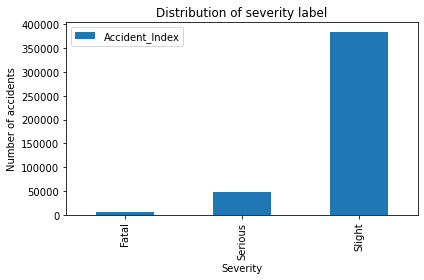

In [32]:
df_distribution = df[['Accident_Severity','Accident_Index']]
df_distribution = df_distribution.groupby(['Accident_Severity']).count()

df_distribution['Severity'] = ['Fatal','Serious','Slight']
df_distribution.set_index('Severity',inplace= True)
df_distribution.plot(kind='bar')
plt.title("Distribution of severity label")
plt.ylabel("Number of accidents")
plt.xlabel("Severity")
# plt.tight_layout()
# plt.savefig('proportion_severity.png')
df_distribution

In [33]:
df['Speed_limit'].unique()

array([30, 50, 40, 60, 20, 70, 10])

### Accidents by speed limit zone

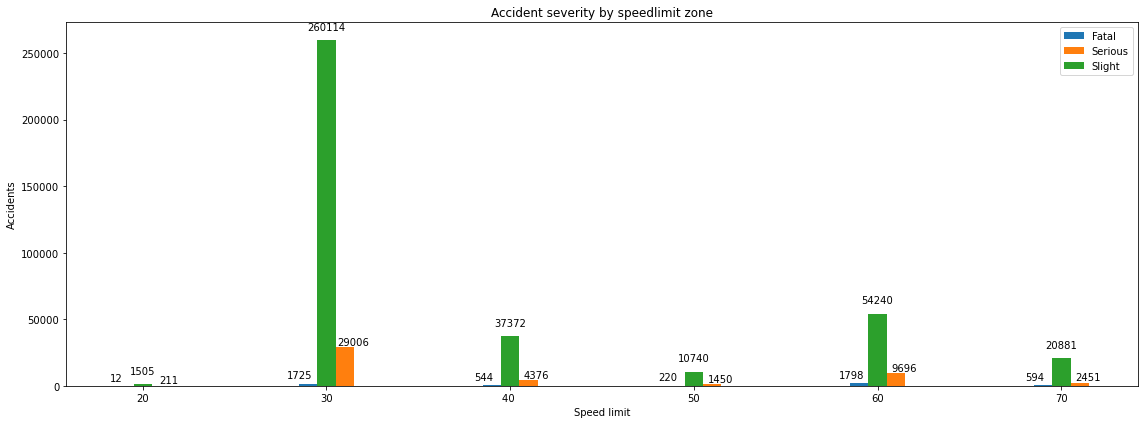

In [34]:
df_speed = df[['Speed_limit','Accident_Severity','Accident_Index']]
df_speed_count = df_speed.groupby(['Speed_limit','Accident_Severity']).count()

df_speed_count.drop([10],inplace=True)
labels = ['20','30','40 ','50','60','70']

df_f = df_speed_count.query('Accident_Severity == 1')
df_ser = df_speed_count.query('Accident_Severity == 2')
df_sli = df_speed_count.query('Accident_Severity == 3')

fatal = df_f.values.tolist()
serious = df_ser.values.tolist()
slight = df_sli.values.tolist()
fatal = sum(fatal,[])
serious = sum(serious,[])
slight = sum(slight,[])

x = np.arange(len(labels)) 
width = 0.10

fig, ax = plt.subplots(figsize=(16,6))

rects1 = ax.bar(x - (width), fatal, width, label='Fatal')
rects2 = ax.bar(x + (width), serious, width, label='Serious')
rects3 = ax.bar(x , slight, width, label = 'Slight')


ax.set_ylabel('Accidents')
ax.set_xlabel('Speed limit')
ax.set_title('Accident severity by speedlimit zone')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects, pos):
    for rect in rects:
        if(pos == 1):
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy = (rect.get_x() + rect.get_width()/2 , height),
                       xytext =(-8,3),
                       textcoords="offset points",
                       ha='center',va='bottom')
        elif (pos==2):
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy = (rect.get_x() + rect.get_width()/2 , height),
                       xytext =(8,0),
                       textcoords="offset points",
                       ha='center',va='bottom')
        else:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy = (rect.get_x() + rect.get_width()/2 , height),
                       xytext =(0,8),
                       textcoords="offset points",
                       ha='center',va='bottom')
        
autolabel(rects1,1)
autolabel(rects2,2)
autolabel(rects3,3)


# fig.tight_layout()
# plt.savefig('speed_limit.png')
plt.show()

In [35]:
df_speed_count

Accident_Index
Speed_limit Accident_Severity                
20          1                              12
            2                             211
            3                            1505
30          1                            1725
            2                           29006
            3                          260114
40          1                             544
            2                            4376
            3                           37372
50          1                             220
            2                            1450
            3                           10740
60          1                            1798
            2                            9696
            3                           54240
70          1                             594
            2                            2451
            3                           20881

### Accidents by weather

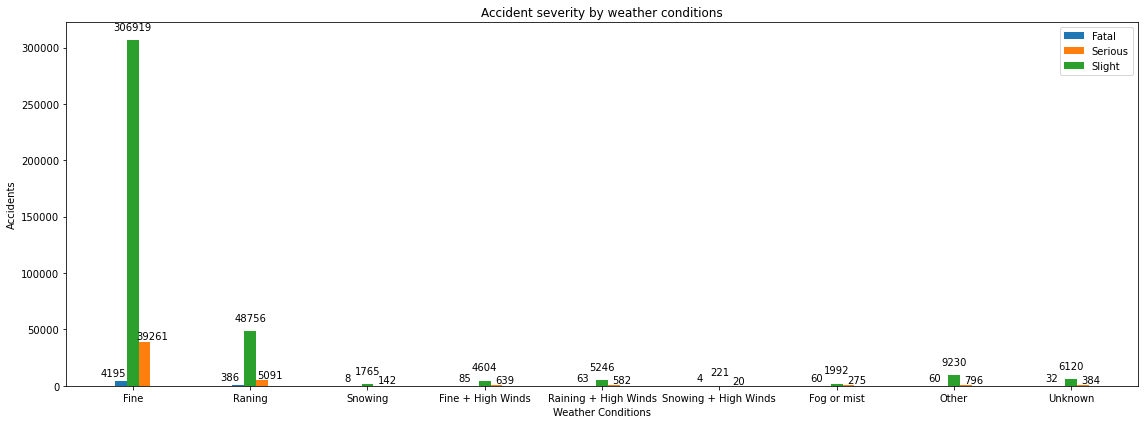

Accident_Index
Weather_Conditions Accident_Severity                
1                  1                            4195
                   2                           39261
                   3                          306919
2                  1                             386
                   2                            5091
                   3                           48756
3                  1                               8
                   2                             142
                   3                            1765
4                  1                              85
                   2                             639
                   3                            4604
5                  1                              63
                   2                             582
                   3                            5246
6                  1                               4
                   2                              20
                   3                             221
7                  1                              60
                   2                             275
                   3                            1992
8                  1                              60
                   2                             796
                   3                            9230
9                  1                              32
                   2                             384
                   3                            6120

In [36]:
df_weather = df[['Weather_Conditions','Accident_Severity','Accident_Index']]
df_weather_count = df_weather.groupby(['Weather_Conditions','Accident_Severity']).count()

labels = ['Fine','Raning','Snowing','Fine + High Winds','Raining + High Winds','Snowing + High Winds','Fog or mist','Other','Unknown']

df_f = df_weather_count.query('Accident_Severity == 1')
df_ser = df_weather_count.query('Accident_Severity == 2')
df_sli = df_weather_count.query('Accident_Severity == 3')

fatal = df_f.values.tolist()
serious = df_ser.values.tolist()
slight = df_sli.values.tolist()
fatal = sum(fatal,[])
serious = sum(serious,[])
slight = sum(slight,[])

x = np.arange(len(labels)) 
width = 0.10

fig, ax = plt.subplots(figsize=(16,6))

rects1 = ax.bar(x - (width), fatal, width, label='Fatal')
rects2 = ax.bar(x + (width), serious, width, label='Serious')
rects3 = ax.bar(x , slight, width, label = 'Slight')


ax.set_ylabel('Accidents')
ax.set_xlabel('Weather Conditions')
ax.set_title('Accident severity by weather conditions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects, pos):
    for rect in rects:
        if(pos == 1):
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy = (rect.get_x() + rect.get_width()/2 , height),
                       xytext =(-8,3),
                       textcoords="offset points",
                       ha='center',va='bottom')
        elif (pos==2):
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy = (rect.get_x() + rect.get_width()/2 , height),
                       xytext =(8,0),
                       textcoords="offset points",
                       ha='center',va='bottom')
        else:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy = (rect.get_x() + rect.get_width()/2 , height),
                       xytext =(0,8),
                       textcoords="offset points",
                       ha='center',va='bottom')
        
autolabel(rects1,1)
autolabel(rects2,2)
autolabel(rects3,3)


# fig.tight_layout()
# plt.savefig('weather.png')
plt.show()



# df_weather_count['Weather']=['Fine','Raning','Snowing','Fine + High Winds','Raining + High Winds','Snowing + High Winds','Fog or mist','Other','Unknown']
# df_weather_count.set_index('Weather',inplace = True)
# df_weather_count.plot(kind='bar')
# plt.title("Accidents per type of weather")
# plt.xlabel("Type of weather")
# plt.ylabel("Number of accidents")

df_weather_count

### Accidents by light conditions

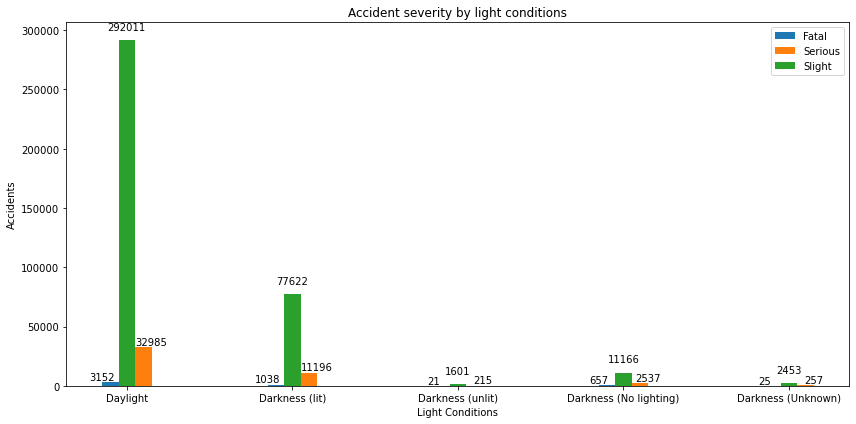

Accident_Index
Light_Conditions Accident_Severity                
1                1                            3152
                 2                           32985
                 3                          292011
4                1                            1038
                 2                           11196
                 3                           77622
5                1                              21
                 2                             215
                 3                            1601
6                1                             657
                 2                            2537
                 3                           11166
7                1                              25
                 2                             257
                 3                            2453

In [37]:
df_light = df[['Light_Conditions','Accident_Severity','Accident_Index']]
df_light_count = df_light.groupby(['Light_Conditions','Accident_Severity']).count()

labels = ['Daylight','Darkness (lit)','Darkness (unlit)','Darkness (No lighting)','Darkness (Unknown)']

df_f = df_light_count.query('Accident_Severity == 1')
df_ser = df_light_count.query('Accident_Severity == 2')
df_sli = df_light_count.query('Accident_Severity == 3')

fatal = df_f.values.tolist()
serious = df_ser.values.tolist()
slight = df_sli.values.tolist()

fatal = sum(fatal,[])
serious = sum(serious,[])
slight = sum(slight,[])

x = np.arange(len(labels)) 
width = 0.10

fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(x - (width), fatal, width, label='Fatal')
rects2 = ax.bar(x + (width), serious, width, label='Serious')
rects3 = ax.bar(x , slight, width, label = 'Slight')


ax.set_ylabel('Accidents')
ax.set_title('Accident severity by light conditions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Light Conditions')
ax.legend()

def autolabel(rects, pos):
    for rect in rects:
        if(pos == 1):
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy = (rect.get_x() + rect.get_width()/2 , height),
                       xytext =(-8,0),
                       textcoords="offset points",
                       ha='center',va='bottom')
        elif (pos==2):
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy = (rect.get_x() + rect.get_width()/2 , height),
                       xytext =(8,0),
                       textcoords="offset points",
                       ha='center',va='bottom')
        else:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy = (rect.get_x() + rect.get_width()/2 , height),
                       xytext =(0,8),
                       textcoords="offset points",
                       ha='center',va='bottom')
        
autolabel(rects1,1)
autolabel(rects2,2)
autolabel(rects3,3)


# fig.tight_layout()
# plt.savefig('light.png')
plt.show()

df_light_count

### Accidents by road conditions

,Accident_Index
RoadC,
Dry,299894
Wet or damp,131399
Snow,1139
Frost or ice,4209
Flood over 3 cm,295


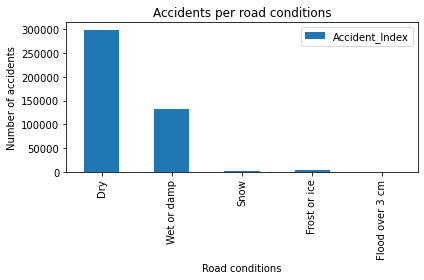

In [38]:
df_roadc = df[['Road_Surface_Conditions','Accident_Index']]
df_roadc_count = df_roadc.groupby(['Road_Surface_Conditions']).count()
df_roadc_count['RoadC']=['Dry','Wet or damp','Snow','Frost or ice','Flood over 3 cm']
df_roadc_count.set_index('RoadC',inplace = True)
df_roadc_count.plot(kind='bar')
plt.title("Accidents per road conditions")
plt.xlabel("Road conditions")
plt.ylabel("Number of accidents")

# plt.tight_layout()
# plt.savefig('road.png')

df_roadc_count

### Distribution of data by year

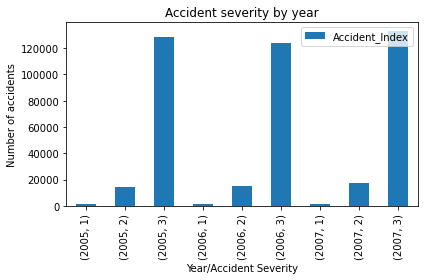

In [39]:
df['Date'] = df['Date'].astype('datetime64')
df['Year'] = pd.DatetimeIndex(df['Date']).year
df_yearly = df[['Year','Accident_Severity','Accident_Index']]
df_yearly_count=df_yearly.groupby(['Year','Accident_Severity']).count()
df_yearly_count.plot(kind='bar')
plt.title("Accident severity by year")
plt.ylabel("Number of accidents")
plt.xlabel("Year/Accident Severity")
# plt.tight_layout()
# plt.savefig('year.png')

### Accidents per day of the week

,Accident_Index
Days,
Sunday,46635
Monday,62000
Tuesday,65157
Wednesday,66660
Thursday,65653
Friday,72451
Saturday,58380


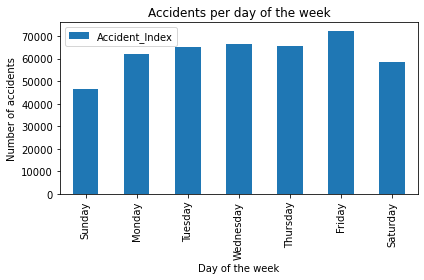

In [40]:
df_weekday = df[['Day_of_Week','Accident_Index']]
df_weekday_count = df_weekday.groupby(['Day_of_Week']).count()
df_weekday_count['Days']=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df_weekday_count.set_index('Days',inplace = True)
df_weekday_count.plot(kind='bar')
plt.title("Accidents per day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Number of accidents")
# plt.tight_layout()
# plt.savefig('weekday.png')
df_weekday_count

### Distribution of data by sex and age

,Accident_Index
Sex,
Male,290954
Female,145982


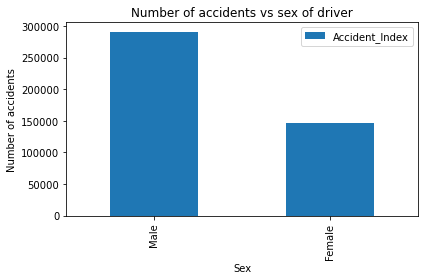

In [41]:
df_sex = df[['Sex_of_Driver','Accident_Index']]
df_sex = df_sex.groupby(['Sex_of_Driver']).count()

df_sex['Sex'] = ['Male','Female']
df_sex.set_index('Sex',inplace=True)

df_sex.plot(kind='bar')
plt.title("Number of accidents vs sex of driver")
plt.xlabel("Sex")
plt.ylabel("Number of accidents")
# plt.tight_layout()
# plt.savefig('sex.png')
df_sex

,Accident_Index
Age Range,
6-10,4
11-15,238
16-20,53505
21-25,55631
26-35,100511
36-45,97478
46-55,62721
56-65,39330
66-75,17258


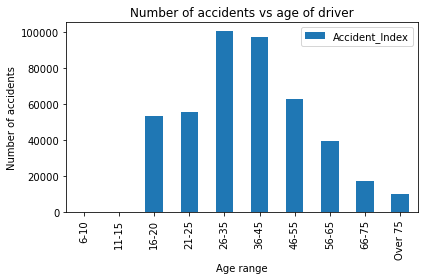

In [42]:
df_age = df[['Age_Band_of_Driver','Accident_Index']]
df_age = df_age.groupby(['Age_Band_of_Driver']).count()
df_age['Age Range']=['6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','Over 75']
df_age.set_index('Age Range',inplace = True)
df_age.plot(kind='bar')
plt.title("Number of accidents vs age of driver")
plt.xlabel("Age range")
plt.ylabel("Number of accidents")
# plt.tight_layout()
# plt.savefig('age.png')
df_age

### Balancing the data

From previous charts we can see that the data is not balanced therefore we will do some undersampling of the data that is more abundant to balance it. A sample size will be used accordingly.

In [43]:
df_f = df.query('Accident_Severity == 1')
df_ser = df.query('Accident_Severity == 2')
df_sli= df.query('Accident_Severity == 3')

In [44]:
# df_f = df_f.sample(n=38)
# df_ser = df_ser.sample(n=418)
# df_sli = df_sli.sample(n=3344)
df_f = df_f.sample(n=3800)
df_ser = df_ser.sample(n=3800)
df_sli = df_sli.sample(n=3800)

In [45]:
frames = [df_f, df_ser, df_sli]
df = pd.concat(frames)
df.head()

,Accident_Index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Age_of_Vehicle,Year
71572,200506A030424,1,1,2005-07-16,7,14:50,6,30,6,4,...,1,1,0,1,9,1,47,8,2,2005
1038813,2007960701428,1,1,2007-05-24,5,13:40,3,30,6,2,...,1,1,0,1,9,1,51,8,10,2007
501992,200620E049903,1,1,2006-03-30,5,19:25,6,30,3,4,...,1,1,0,1,9,1,44,7,1,2006
785816,200706M080667,1,1,2007-06-10,7,15:16,3,30,3,2,...,1,1,0,1,19,1,27,6,5,2007
238665,200542G095812,1,2,2005-10-12,7,20:33,3,70,0,0,...,1,1,0,2,9,1,46,8,5,2005


,Accident_Index
Severity,
Fatal,3800
Serious,3800
Slight,3800


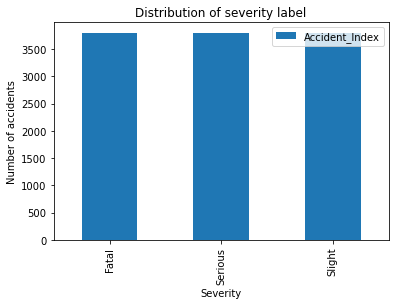

In [46]:
df_distribution = df[['Accident_Severity','Accident_Index']]
df_distribution = df_distribution.groupby(['Accident_Severity']).count()

df_distribution['Severity'] = ['Fatal','Serious','Slight']
df_distribution.set_index('Severity',inplace= True)
df_distribution.plot(kind='bar')
plt.title("Distribution of severity label")
plt.ylabel("Number of accidents")
plt.xlabel("Severity")
df_distribution

### Convert Numerical features to categorical values

In [47]:
df['Sex_of_Driver'].replace(to_replace=[1,2], value=[1,0],inplace=True)
df.head()

,Accident_Index,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Age_of_Vehicle,Year
71572,200506A030424,1,1,2005-07-16,7,14:50,6,30,6,4,...,1,1,0,1,9,1,47,8,2,2005
1038813,2007960701428,1,1,2007-05-24,5,13:40,3,30,6,2,...,1,1,0,1,9,1,51,8,10,2007
501992,200620E049903,1,1,2006-03-30,5,19:25,6,30,3,4,...,1,1,0,1,9,1,44,7,1,2006
785816,200706M080667,1,1,2007-06-10,7,15:16,3,30,3,2,...,1,1,0,1,19,1,27,6,5,2007
238665,200542G095812,1,2,2005-10-12,7,20:33,3,70,0,0,...,1,1,0,2,9,1,46,8,5,2005


In [48]:
### ROAD CONDITION
roadtype = ['Roundabout','One-way street','Dual carriageway','Single carriageway','Slip Road','Unknown','One-way street']
values_roadtype = [1,2,3,6,7,9,12]
df['Road_Type'].replace(to_replace=values_roadtype, value=roadtype,inplace=True)

### COLUMNS TO DROP
to_drop = ['Accident_Index','Junction_Detail','Special_Conditions_at_Site','Urban_or_Rural_Area','Age_of_Driver','Age_of_Vehicle','Year','Vehicle_Type']
df.drop(columns=to_drop, inplace = True)

### JUNCTION CONTROL
junctionc = ['Not a junction','Authorised person','Auto traffic signal','Stop sign','Uncontrolled']
values_junctionc = [0,1,2,3,4]
df['Junction_Control'].replace(to_replace=values_junctionc, value=junctionc,inplace=True)

### LIGHT CONDITIONS
lightc = ['Daylight','Darkness (lit)','Darkness (unlit)','Darkness (No lighting)','Darkness (Unknown)']
values_lightc = [1,4,5,6,7]
df['Light_Conditions'].replace(to_replace=values_lightc, value=lightc,inplace=True)

### WEATHER CONDITIONS
weatherc = ['Fine','Raning','Snowing','Fine + High Winds','Raining + High Winds','Snowing + High Winds','Fog or mist','Other','Unknown']
values_weatherc= [1,2,3,4,5,6,7,8,9]
df['Weather_Conditions'].replace(to_replace=values_weatherc, value=weatherc,inplace=True)

### ROAD SURFACE CONDTIONS
roadsc = ['Dry','Wet or damp','Snow','Frost or ice','Flood over 3 cm','Oil or diesel','Mud']
values_roadsc = [1,2,3,4,5,6,7]
df['Road_Surface_Conditions'].replace(to_replace=values_roadsc, value=roadsc,inplace=True)

### Get dummy variables

In [49]:
df['Date'] = df['Date'].map(dt.datetime.toordinal)
df['Time'] = pd.to_datetime(df['Time'],format = '%H:%M')
df['Time'] = df['Time'].dt.hour
#df['Date'] = df['Date'].map(dt.datetime.toordinal)
#df['Time'] = (df['Time'].time.hour * 60 + df['Time'].time.minute) * 60
df['Time'].head()
#df['Time'] = df['Time'].map(dt.datetime.toordinal)
# for row in df['Time']:
#     if row == '12:01':
#         print(df.Time.to_string(index=False))
#df.dtypes

71572      14
1038813    13
501992     19
785816     15
238665     20
Name: Time, dtype: int64

In [50]:
dummies_required = ['Road_Type','Junction_Control','Light_Conditions','Weather_Conditions','Road_Surface_Conditions']
#df_features = df['Accident_Severity']
df = pd.concat([df,pd.get_dummies(df[dummies_required])],axis=1)
df.drop(dummies_required,axis=1,inplace=True)
df.head()

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Speed_limit,Sex_of_Driver,Age_Band_of_Driver,Road_Type_Dual carriageway,Road_Type_One-way street,...,Weather_Conditions_Raining + High Winds,Weather_Conditions_Raning,Weather_Conditions_Snowing,Weather_Conditions_Snowing + High Winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood over 3 cm,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp
71572,1,1,732143,7,14,30,1,8,0,0,...,0,0,0,0,0,1,0,0,0,0
1038813,1,1,732820,5,13,30,1,8,1,0,...,0,0,0,0,0,1,0,0,0,0
501992,1,1,732400,5,19,30,1,7,0,0,...,0,0,0,0,0,1,0,0,0,0
785816,1,1,732837,7,15,30,1,6,1,0,...,0,0,0,0,0,1,0,0,0,0
238665,1,2,732231,7,20,70,1,8,1,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
for col in df.columns:
    print(col)
#df.head()


Accident_Severity
Number_of_Casualties
Date
Day_of_Week
Time
Speed_limit
Sex_of_Driver
Age_Band_of_Driver
Road_Type_Dual carriageway
Road_Type_One-way street
Road_Type_Roundabout
Road_Type_Single carriageway
Road_Type_Slip Road
Road_Type_Unknown
Junction_Control_Authorised person
Junction_Control_Auto traffic signal
Junction_Control_Not a junction
Junction_Control_Stop sign
Junction_Control_Uncontrolled
Light_Conditions_Darkness (No lighting)
Light_Conditions_Darkness (Unknown)
Light_Conditions_Darkness (lit)
Light_Conditions_Darkness (unlit)
Light_Conditions_Daylight
Weather_Conditions_Fine
Weather_Conditions_Fine + High Winds
Weather_Conditions_Fog or mist
Weather_Conditions_Other
Weather_Conditions_Raining + High Winds
Weather_Conditions_Raning
Weather_Conditions_Snowing
Weather_Conditions_Snowing + High Winds
Weather_Conditions_Unknown
Road_Surface_Conditions_Dry
Road_Surface_Conditions_Flood over 3 cm
Road_Surface_Conditions_Frost or ice
Road_Surface_Conditions_Snow
Road_Surface_C

In [52]:
### SHUFFLE
df.sample(frac=1)

,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Speed_limit,Sex_of_Driver,Age_Band_of_Driver,Road_Type_Dual carriageway,Road_Type_One-way street,...,Weather_Conditions_Raining + High Winds,Weather_Conditions_Raning,Weather_Conditions_Snowing,Weather_Conditions_Snowing + High Winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood over 3 cm,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp
1006678,3,1,732693,4,22,50,1,6,1,0,...,0,1,0,0,0,0,0,0,0,1
923293,3,1,732859,4,8,60,1,6,1,0,...,0,0,0,0,0,1,0,0,0,0
597661,3,1,732657,3,19,50,0,7,0,0,...,0,0,0,0,0,0,0,0,0,1
793232,1,1,732999,2,17,40,1,9,0,0,...,0,0,0,0,0,1,0,0,0,0
993901,2,1,732811,3,16,60,1,9,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156603,2,1,732029,5,8,40,1,6,1,0,...,0,0,0,0,0,1,0,0,0,0
589511,3,1,732602,4,11,40,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
442994,1,1,732409,6,19,60,1,6,0,0,...,0,0,0,0,0,1,0,0,0,0
987602,1,2,732684,4,7,70,1,7,1,0,...,0,0,0,0,0,1,0,0,0,0


### K Nearest Neighbor (KNN)

In [53]:
# # Split X into train and test 
X = df

In [54]:
y = df['Accident_Severity'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [55]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.22474487, -0.47644217, -1.15302451,  1.44709433,  0.03798949,
        -0.79280294,  0.58707475,  0.69539852, -0.42224942, -0.12486072,
        -0.26726124,  0.57262335, -0.09733908, -0.06502561, -0.04397222,
        -0.36109787, -0.42095071, -0.11350402,  0.62442366, -0.28366584,
        -0.07688913, -0.5217082 , -0.06703572,  0.65274003,  0.45242895,
        -0.12376932, -0.08511813, -0.13599155, -0.11230874, -0.33915111,
        -0.04962044, -0.02649995, -0.10400731,  0.64877952, -0.03864525,
        -0.08769417, -0.03976738, -0.63216428],
       [-1.22474487, -0.47644217,  0.98110101,  0.43888193, -0.15014266,
        -0.79280294,  0.58707475,  0.69539852,  2.36826849, -0.12486072,
        -0.26726124, -1.74634864, -0.09733908, -0.06502561, -0.04397222,
         2.76933232, -0.42095071, -0.11350402, -1.6014768 , -0.28366584,
        -0.07688913, -0.5217082 , -0.06703572,  0.65274003,  0.45242895,
        -0.12376932, -0.08511813, -0.13599155, -0.11230874, -0.33915111,
   

### Train/test split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9120, 38) (9120,)
Test set: (2280, 38) (2280,)


In [57]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [58]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([2, 1, 2, 2, 2])

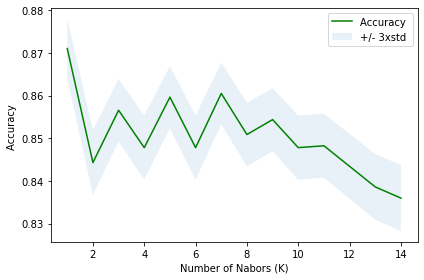

In [75]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
# plt.savefig('best_k.png')
# plt.tight_layout()
plt.show()

In [60]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=7)

### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [62]:
yhat = DT_model.predict(X_test)
yhat

array([2, 1, 2, ..., 1, 3, 3])

### Support Vector Machine

In [63]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC()

In [64]:
yhat = SVM_model.predict(X_test)
yhat

array([2, 1, 2, ..., 1, 3, 3])

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [66]:
yhat = LR_model.predict(X_test)
yhat

array([2, 1, 2, ..., 1, 3, 3])

### Evaluation metrics

In [67]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [68]:
k = 1
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn_model

knn_yhat = knn_model.predict(X_test)
knn_yhat[0:5]

array([2, 1, 2, 2, 2])

In [69]:
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat,average='weighted'))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.77
KNN F1-score: 0.87


### For DT

In [70]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_score(y_test, DT_yhat,average='weighted'))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 1.00
DT F1-score: 1.00


### For SVM

In [71]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, SVM_yhat,average='weighted'))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.96
SVM F1-score: 0.98


### For LR

In [72]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat,average='weighted'))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 1.00
LR F1-score: 1.00
LR LogLoss: 0.14


In [73]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2,3]))

[[760   0   0]
 [  0 760   0]
 [  0   0 760]]


Confusion matrix, without normalization
[[760   0   0]
 [  0 760   0]
 [  0   0 760]]


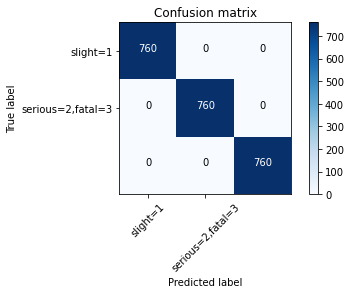

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['slight=1','serious=2,fatal=3'],normalize= False,  title='Confusion matrix')

## Results and discussion <a name="results"></a>

Several things can be noted from the initial analysis. Contrary to a possible preconceived notion that it is probable that most accidents occur during poor external conditions (Light, Weather, Road, etc). The analysis reveals that it is not the case. Most accidents occur during good weather with no external conditions to impair the driver.

Most accidents occur in low-speed zones. And it is important to remark that there is a significant difference in the percentage of men and women who have accidents. One other factor is that there is no relation between the day of the week and the amount of accidents, except for Fridays which have a slightly higher number of accidents per day.

The biggest amount of accidents occur during daylight and the second most accidents occur during nigth time under well-lit conditions.

The model developed using K-NN has an Jaccard index of: 0.78 and F-1 Score of 0.88.


## Conclusion <a name="conclusion"></a>

The results lead one to believe that most accidents occur due to internal, driver reasons and not external. Since good external conditions yield a much lower number of accidents. This could be to a number of reasons: with good conditions drivers feel much more confident and do not excercise as much caution. Or there is more traffic on the roads. However, the initial hypothesis that bad weather conditions was the main cause of vehicular accidents can be discarded and some other possibilities need to be contemplated and explored, perhaps in another project or further analysis. At the moment even though the model works, I would consider the possibility of other factors having a bigger impact on the severity of an accident, factors which are not available in this dataset and require a new study.


The model and determining the severity of an accident could see its main application with insurance companies, which could probably be the most interested party due to the reasons that their costs are relative to the probability of a driver having an accident.